# Информация о датасете

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Датасет: https://www.kaggle.com/datasets/fearsomejockey/olympics-dataset-2020-tokyo-dataset

Данные о столбцах датасета:

In [ ]:
inf_dop = pd.read_csv('/content/df_dop.csv')
inf_dop

,Название столбцов,Описание данных,Тип данных,Шкала
0,Name,Имя спортсмена,object,Номинальная
1,Sex,Пол,object,Номинальная
2,Age,Возраст,float,Относительная
3,Team,"Страна, за которую выступает спортсмен",object,Номинальная
4,Games,Название олимпийских игр,object,Номинальная
5,Year,Год олимпийских игр,integer,Относительная
6,Season,Сезон,object,Номинальная
7,Sport,Вид спорта,object,Номинальная
8,Medal,Тип медали,integer,Номинальная


Датасет: https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps

Данные о столбцах датасета:

In [ ]:
inf = pd.read_csv('/content/df.csv')
inf

,Название столбца,Описание данных,Тип данных,Шкала
0,App Name,Название приложения,object,Номинальная
1,App Id,Сайт данного приложения,object,Номинальная
2,Category,Название категории,object,Номинальная
3,Rating,Рейтинг приложения от 0 до 5,float,Интервальная
4,Rating Count,Количество отзывов,float,Интервальная
5,Installs,"Количество установок, отображаемое в Google Play",object,Относительная
6,Minimum Installs,"Количество установок, отображаемое в Google Play",float,Относительная
7,Maximum Installs,Действительное количество установок приложений,int,Относительная
8,Free,Показатель платное или бесплатное приложение,bool,Номинальная
9,Price,Цена приложения,float,Относительная


# Предобработка данных


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Google-Playstore.csv')

Удалим "ненужные" столбцы, которые содержат либо дублирующую информацию (Installs), либо административные данные, не требующиеся для проверки наших гипотез (Developer Id).

In [ ]:
data = df.drop(columns=['App Id', 'Installs', 'Developer Id', 'Developer Website', 'Privacy Policy', 'Scraped Time'])

In [ ]:
missing_count = data.isna().sum()
missing_percentage = missing_count / len(data) * 100
missing_data = pd.DataFrame({"Count" : missing_count, "Percentage" : missing_percentage})
missing_data

,Count,Percentage
App Name,2,0.000086
Category,0,0.000000
Rating,22883,0.989345
Rating Count,22883,0.989345
Minimum Installs,107,0.004626
Maximum Installs,0,0.000000
Free,0,0.000000
Price,0,0.000000
Currency,135,0.005837
Size,196,0.008474


Пропущенных значений мало (менее 5%), а значит их можно удалить

In [ ]:
data = data.dropna(subset=missing_data.index.values)

Преобразуем столбец Size в тип float. Для этого будем измерять размер приложения в килобайтах. Информацию о приложениях без фиксированного размера удалим.

In [ ]:
data['Size'] = data.Size.apply(lambda x: x.strip('+'))
data['Size'] = data.Size.apply(lambda x: x.replace(',', ''))
data['Size'] = data.Size.apply(lambda x: x.replace('k', ''))
data['Size'] = data.Size.apply(lambda x: x.replace('M', 'e+3'))
data['Size'] = data.Size.apply(lambda x: x.replace('G', 'e+6'))
data['Size'] = data.Size.replace('Varies with device', np.nan)
data['Size'] = pd.to_numeric(data['Size'])
data.dropna(subset = ['Size'], inplace=True)

Столбцы Released и Last Updated преобразуем в тип datetime

In [ ]:
data['Released'] = pd.to_datetime(data['Released'], format='%b %d, %Y', infer_datetime_format=True, errors='coerce')
data['Last Updated'] = pd.to_datetime(data['Last Updated'], format='%b %d, %Y', infer_datetime_format=True, errors='coerce')

В минимальной версии андроида уберем примечание "and up"

In [ ]:
data['Minimum Android'] = data['Minimum Android'].apply(lambda x: x.split()[0])

In [ ]:
data

,App Name,Category,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,Adventure,0.0,0.0,10.0,15,True,0.0,USD,10000.0,7.1,jean21101999@gmail.com,2020-02-26,2020-02-26,Everyone,False,False,False
1,Ampere Battery Info,Tools,4.4,64.0,5000.0,7662,True,0.0,USD,2900.0,5.0,webserveis@gmail.com,2020-05-21,2021-05-06,Everyone,True,False,False
2,Vibook,Productivity,0.0,0.0,50.0,58,True,0.0,USD,3700.0,4.0.3,vnacrewit@gmail.com,2019-08-09,2019-08-19,Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10.0,19,True,0.0,USD,1800.0,4.0.3,climatesmarttech2@gmail.com,2018-09-10,2018-10-13,Everyone,True,False,False
4,GROW.me,Tools,0.0,0.0,100.0,478,True,0.0,USD,6200.0,4.1,rmilekhorodyski@gmail.com,2020-02-21,2018-11-12,Everyone,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312938,Lero TOEFL Recorder + Timer,Education,3.4,17.0,1000.0,1980,True,0.0,USD,10000.0,4.1,lero.doe@gmail.com,2018-05-22,2018-12-14,Everyone,True,False,False
2312940,ORU Online,Education,0.0,0.0,100.0,430,True,0.0,USD,44000.0,4.1,3DreamDeveloper@gmail.com,2018-01-17,2018-02-02,Everyone,False,False,False
2312941,Data Structure,Education,0.0,0.0,100.0,202,True,0.0,USD,29000.0,5.0,appoworld.official@gmail.com,2018-08-19,2018-08-19,Everyone,False,False,False
2312942,Devi Suktam,Music & Audio,3.5,8.0,1000.0,2635,True,0.0,USD,10000.0,5.0,ruchisono@gmail.com,2016-08-01,2021-05-05,Everyone,True,False,False


# Гипотезы

Гипотеза 1: В раздел "Выбор редакции" не попадают приложения с рейтингом ниже 3 (Не подтверждена)

Несмотря на то, что большая часть приложений в разделе имеет рейтинг выше 3, приложения с рейтингом ниже всё-таки присутствуют.

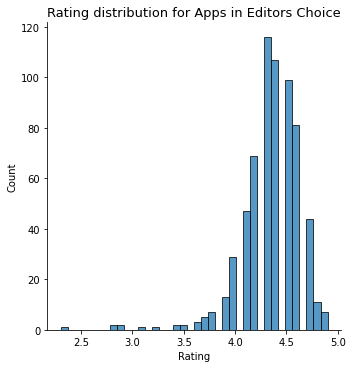

In [ ]:
data1 = data[data['Editors Choice'] == True]
sns.displot(data1, x='Rating')
plt.title('Rating distribution for Apps in Editors Choice', size=13);

Гипотеза 2: Бесплатные приложения чаще содержат платный контент (Подтверждена)

Второй возможный приток денег - платный контент. И он правда чаще встречается в бесплатных приложения, но более 90% бесплатных приложений покупок внутри не содержат.

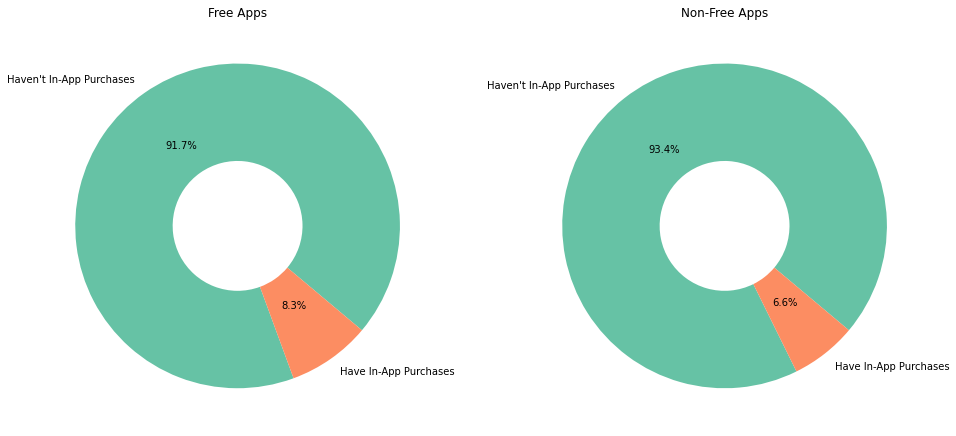

In [ ]:
data2 = pd.DataFrame(data.groupby(['Free', 'In App Purchases']).agg('count')['App Name']).reset_index().rename(columns={'App Name': 'Count'})
for i in range(len(data2)):
    if data2.at[i, 'In App Purchases'] == True:
        data2.loc[i, 'In App Purchases'] = "Have In-App Purchases"
    else:
        data2.loc[i, 'In App Purchases'] = "Haven't In-App Purchases"

data2_free = data2[data2.Free == True]
data2_not_free = data2[data2.Free == False]

sns.set_palette("Set2")
fig, axis = plt.subplots(1, 2, figsize=(16, 8))
axis[0].pie(x=data2_free.Count, labels=data2_free['In App Purchases'], wedgeprops=dict(width=0.6), startangle=-40, autopct='%1.1f%%')
axis[1].pie(x=data2_not_free.Count, labels=data2_not_free['In App Purchases'], wedgeprops=dict(width=0.6), startangle=-40, autopct='%1.1f%%'); #легенду сделать можно, но мне пока лень(
axis[0].set(title='Free Apps')
axis[1].set(title='Non-Free Apps')
plt.show()

Гипотеза 3: Приложения, содержащие рекламу, всегда содержат платный контент (Не подтверждена)

Как оказалось, приложений, содержащих и рекламу, и платный контент одновременно, очень мало, это связано с тем, что в целом приложений, имеющих платный контент, не так много.

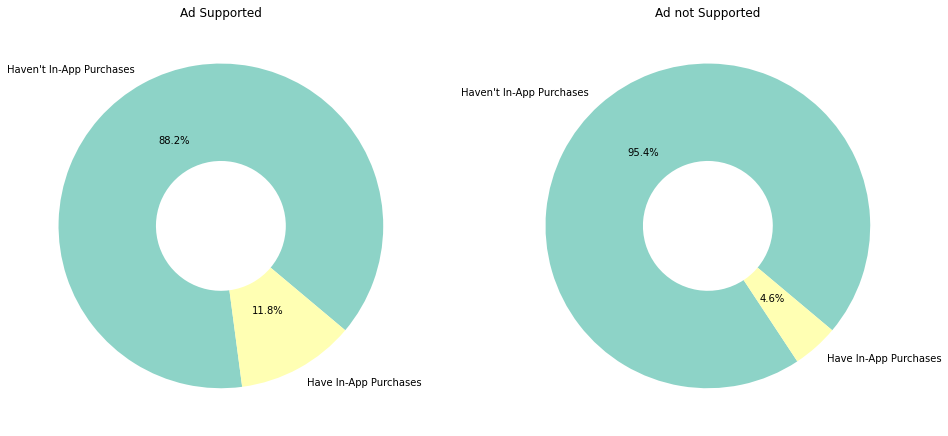

In [ ]:
data3 = pd.DataFrame(data.groupby(['Ad Supported', 'In App Purchases']).agg('count')['App Name']).reset_index().rename(columns={'App Name': 'Count'})
for i in range(len(data3)):
    if data3.at[i, 'In App Purchases'] == True:
        data3.loc[i, 'In App Purchases'] = "Have In-App Purchases"
    else:
        data3.loc[i, 'In App Purchases'] = "Haven't In-App Purchases"

data3_with_ads = data3[data3['Ad Supported'] == True]
data3_without_ads = data3[data3['Ad Supported'] == False]

sns.set_palette("Set3")
fig, axis = plt.subplots(1, 2, figsize=(16, 8))
axis[0].pie(x=data3_with_ads.Count, labels=data3_with_ads['In App Purchases'], wedgeprops=dict(width=0.6), startangle=-40, autopct='%1.1f%%')
axis[1].pie(x=data3_without_ads.Count, labels=data3_without_ads['In App Purchases'], wedgeprops=dict(width=0.6), startangle=-40, autopct='%1.1f%%');
axis[0].set(title='Ad Supported')
axis[1].set(title='Ad not Supported')
plt.show()

Гипотеза 4: Все разработчики пользуются почтовым сервисом GMail (Не подтверждена)

Казалось, что разработчикам обзательно нужно иметь почтовый домен от компании Google, чтобы загружать приложения в их магазин приложений. Как оказалось, только чуть больше половины разработчкиов пользуются почтовым сервисом Google.


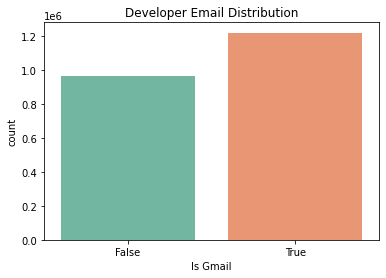

In [ ]:
sns.set_palette('Set2')
data4 = data[['Developer Email']]
data4['Gmail bool'] = data4['Developer Email'].apply(lambda x: "@gmail.com" in x)
data4 = data4.groupby('Gmail bool').agg('count').reset_index()
sns.barplot(x=data4['Gmail bool'], y=data4['Developer Email'])
plt.ylabel('count')
plt.xlabel('Is Gmail')
plt.title('Developer Email Distribution');


Гипотеза 5: Приложения с более низкими требованиями к версии Android более скачиваемы (Подтверждена)

Наиболее скачиваемы приложения, поддерживающие версии Android 4.1, 4.4, 5.0, являющиеся устаревшими.

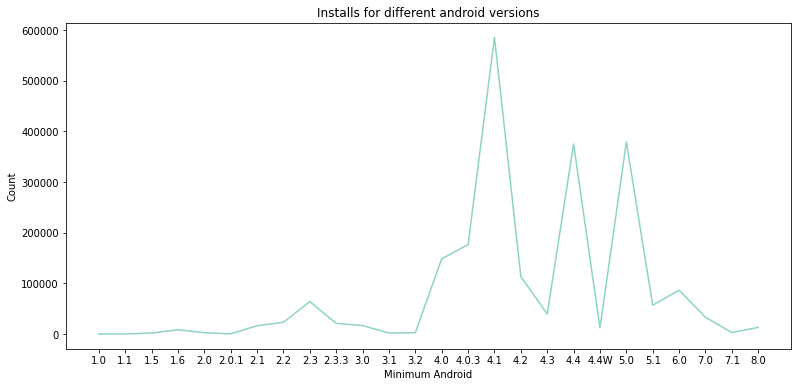

In [ ]:
plt.figure(figsize = (13,6))
data5 = data[['Minimum Android','Maximum Installs']]
data5 = data5.groupby('Minimum Android').agg('count').drop('Varies', axis=0).reset_index().rename(columns={'Maximum Installs': 'Count'})
sns.lineplot(x='Minimum Android', y='Count', data=data5)
plt.title('Installs for different android versions', size=12);

Гипотеза 6: Приложения, ни разу не обновлённые после релиза, почти не имеют скачиваний (меньше 1000 скачиваний) (Подтверждена)

Как видно из графика, медианное значение скачиваний менее 100, хотя и имеется большое количество выбрсоов.

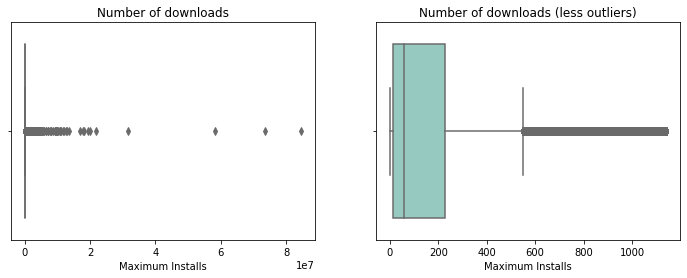

In [ ]:
data6 = data.loc[data['Released']==data['Last Updated']]
data6_not_ex = data6[data6['Maximum Installs'] < data6.describe().at['75%','Maximum Installs']]

fig, axis = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(x=data6['Maximum Installs'], ax=axis[0])
sns.boxplot(x=data6_not_ex['Maximum Installs'], ax=axis[1])
axis[0].set(title='Number of downloads')
axis[1].set(title='Number of downloads (less outliers)');

Гипотеза 7: Приложения с низкими требованиями к версии Android давно не обновлялись (Подтверждена)

Чем выше версия Android, тем меньше времени прошло с последнего обновления.

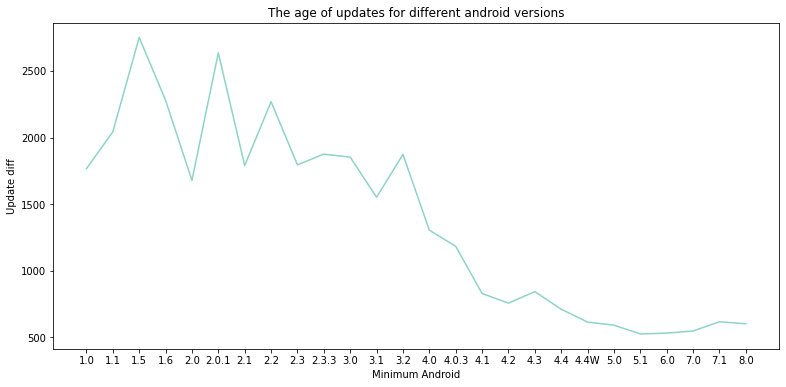

In [ ]:
data7 = data[data['Last Updated'] >= data['Released']]
data7['Update diff'] = (pd.Timestamp.now() - data7['Last Updated']).dt.days
data7 = pd.DataFrame(data7.groupby('Minimum Android').agg('mean').drop('Varies', axis=0)['Update diff'])

plt.figure(figsize = (13,6))
sns.lineplot(x='Minimum Android', y='Update diff', data=data7)
plt.title('The age of updates for different android versions', size=12);

Гипотеза 8: Платные приложения имеют более высокий рейтинг (Подтверждена)

Средний рейтинг платных приложений действительно выше, однако эта разница совсем не существенна

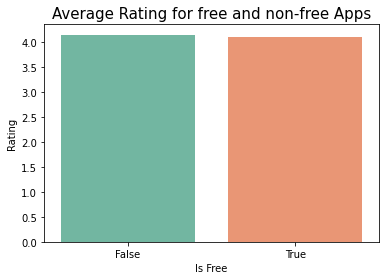

In [ ]:
data8 = data[data['Rating'] > 0]
data8 = data8.groupby(['Free'])['Rating'].mean().to_frame()
sns.barplot(x=data8.index, y=data8.Rating)
plt.xlabel('Is Free')
plt.title('Average Rating for free and non-free Apps', size=15);